# Αναγνώριση Προτύπων

# Εργασία 2

Τσιμπλιαρίδης Νικόλαος, ΑΕΜ: 9652

Τζελίλαϊ Τζούλιο, ΑΕΜ: 9662

# Μέρος Α'

## Ερώτημα 1

In [1]:
import math
import scipy as sci
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
 

Βάζουμε στον πίνακα D1 όλες τις τιμές του x για τους συναδέλφους που δεν είχαν στρές, ενώ στο D2 όλες τις τιμές του x για τους συναδέλφους που παρατήρησαν στρες

In [2]:
D1 = [2.8, -0.4, -0.8, 2.3, -0.3, 3.6, 4.1]
D2 = [-4.5, -3.4, -3.1, -3.0, -2.3]

Η πιθανοφάνεια υπολογίζεται από τον τύπο:

p(D|θ) = Π(από 1 εώς Ν) p(xn; θ)

Στην προκειμένη περίπτωση έχουμε μόνο 7 χαρακτηριστικά για D1 και 5 για D2,

άρα p(D1|θ1) = Π(από 1 εώς 7) p(x;θ1)

και p(D2|θ2) = Π(από 1 εώς 5) p(x;θ2)

Στην συνέχεια απεικονίζουμε και τις συναρτήσεις p(D1|θ1) και p(D2|θ2) για να δούμε που περίπου εμφανίζουν το μέγιστο τους, ώστε να επιλέξουμε τα σωστά θ.

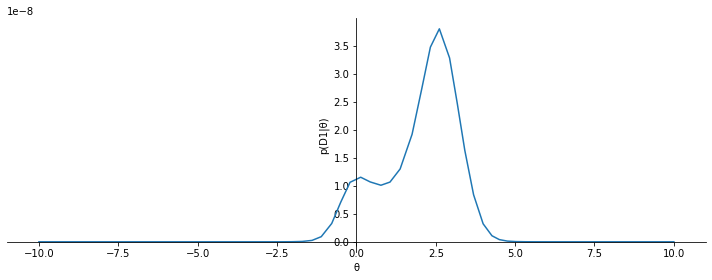

In [3]:
theta = sym.Symbol('theta', real=True)

pD1theta = 1
for i in range(7):
    x = D1[i]
    #η f παίρνει τον τύπο της p(x|θ) για συγκεκριμένο x και σε κάθε επανάληψη πολλαπλασιάζεται με όλες τις προηγούμενες,
    #αποθηκεύοντας τον τελικό τύπο στην pD1theta
    f = 1/(math.pi *(1+(x-theta)**2))
    pD1theta = pD1theta*f
sym.plot(pD1theta, xlabel = 'θ', ylabel = 'p(D1|θ)', size = (10,4))



Για να βρούμε την μέγιστη πιθανοφάνεια βρίσκουμε την παράγωγο της συνάρτησης και που αυτή μηδενίζει, μας ενδιαφέρει μόνο η μεγαλύτερη τιμή, άρα θα ψάξουμε κοντά στο 2.5 που βέλπουμε ότι είναι το μέγιστο

In [4]:
#Υπολογίζουμε την παράγωγο και την μηδενίζουμε για να βρούμε τα κρίσιμα σημεία
pD1theta_derrivative = sym.diff(pD1theta,theta)
theta1 = sym.solve([theta>2.3, theta< 3.7, pD1theta_derrivative], theta)

print(theta1)


(2.3 < theta) & (theta < 3.7) & (Eq(theta, 0.0564138790948393) | Eq(theta, 0.773097881995502) | Eq(theta, 2.59979479178898))


Παίρνουμε 3 τιμές που μηδενιζουν την παράγωγο της p(D1|θ) και από την γραφική της παράσταση καταλαβαίνουμε ότι η πρώτη τιμή αντιστοιχεί στο τοπικό μέγιστο, η δεύτερη στο τοπικό ελάχιστο και η τρίτη είναι το ολικό μέγιστο που ψάχνουμε.
 Άρα η τιμή του θ1 θα είναι 2.59979479178898

Επαναλαμβάνουμε την ίδια διαδικασία και για το σύνολο D2

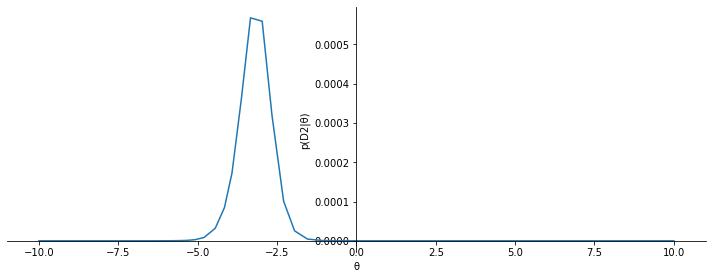

Eq(theta, -3.1614564774175) & (-5 <= theta) & (theta <= -2)


In [5]:
pD2theta = 1
for i in range(5):
    x = D2[i]
    #η f παίρνει τον τύπο της p(x|θ) για συγκεκριμένο x και σε κάθε επανάληψη πολλαπλασιάζεται με όλες τις προηγούμενες,
    #αποθηκεύοντας τον τελικό τύπο στην pD1theta
    f = 1/math.pi * 1/(1+(x-theta)**2)
    pD2theta = pD2theta*f

sym.plot(pD2theta, xlabel = 'θ', ylabel = 'p(D2|θ)', size = (10,4))

#Υπολογίζουμε την παράγωγο και την μηδενίζουμε για να βρούμε τα κρίσιμα σημεία
pD2theta_derrivative = sym.diff(pD2theta,theta)
theta2 = sym.solve([theta >= -5, theta <= -2, pD2theta_derrivative], 0)

print(theta2)

Εδώ έχουμε μόνο μία τιμή που μηδενίζει την παράγωγο, άρα θα είναι και το ολικό μέγιστο που ψάχνουμε, όπως φαίνεται και από την γραφική παράσταση

Απεικονίζουμε μαζί και για D1 και για D2 την log-likelihood των τιμών συναρτήσει του θ.

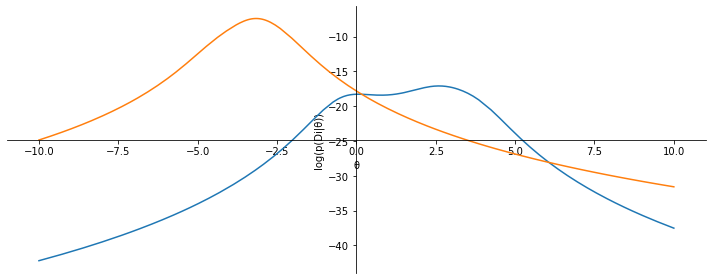

In [6]:
sym.plot(sym.log(pD1theta), sym.log(pD2theta), xlabel = 'θ', ylabel = 'log(p(Di|θ))', size = (10,4))

## Ερώτημα 2

Ορίζουμε τις τιμές που υπολογίσαμε παραπάνω για τα θ1 και θ2 και ορίζουμε την συνάρτηση διάκρισης g(x) και την πλοτάρουμε για όλα τα x.

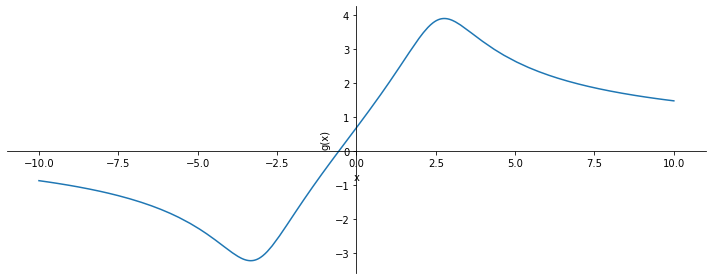

(-5 < x) & (Eq(x, -34.5772297064006) | Eq(x, -0.551938253978904))


In [7]:
theta1 = 2.5997945236914
theta2 = -3.1614564774175

x = sym.Symbol('x', real=True)
g = sym.log(1/math.pi * 1/(1+(x-theta1)**2)) - sym.log(1/math.pi * 1/(1+(x-theta2)**2)) + sym.log(7/12) - sym.log(5/12)

graph1 = sym.plot(g, xlabel = 'x', ylabel = 'g(x)', size = (10,4))
xzero = sym.solve([x> -5, g],0)
print(xzero)

Παρατηρούμε ότι στο διάστημα που μας ενδιαφέρει η g(x) ισούται με μηδέν για x ≈ -0.551938253978904, για μεγαλύτερα x παίρνει θετικές τιμές, ενώ για μικρότερα παίρνει αρνητικές.

Δημιουργούμε μια συνάρτηση για να αντικαθιστάμε πιο εύκολα τιμές στην g(x)

In [8]:
def gx(x0):
    g0 = g.subs({x:x0})
    return g0

Αρχικοποιούμε έναν πίνακα με μηδενικά likelihood_of_D1, στον οποίο θα αποθηκεύσουμε τις τιμές, που παίρνει η g(x) για τις μετρήσεις που είχαμε στο D1

In [9]:
likelihood_of_D1 = np.zeros(7)

for i in range(7):
    likelihood_of_D1[i] = gx(D1[i])
    

Αρχικοποιούμε έναν πίνακα με μηδενικά likelihood_of_D2, στον οποίο θα αποθηκεύσουμε τις τιμές, που παίρνει η g(x) για τις μετρήσεις που είχαμε στο D2

In [10]:
likelihood_of_D2 = np.zeros(5)

for i in range(5):
    likelihood_of_D2[i] = gx(D2[i])
    

Πλοτάρουμε τις τιμές του που πήραμε για D1 και D2

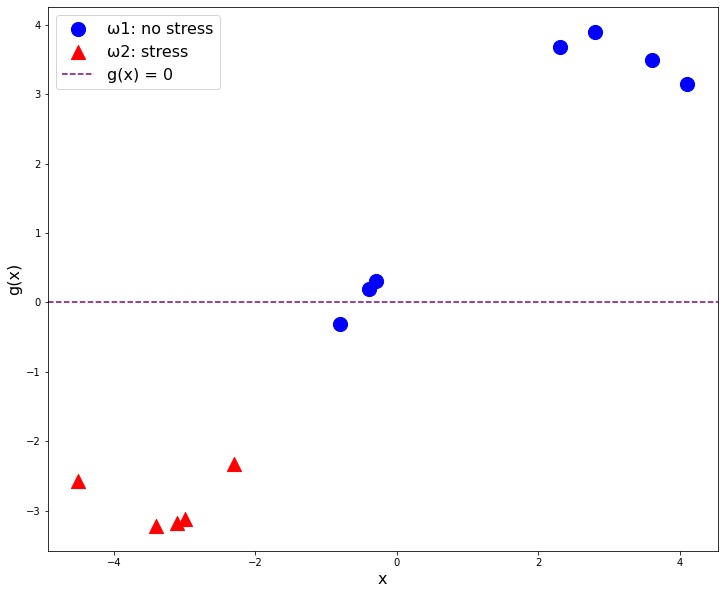

In [11]:
fig = plt.figure(figsize=(12,10))

plt.scatter(D1, likelihood_of_D1, marker = 'o', s = 200, c = 'blue', label = 'ω1: no stress')
plt.scatter(D2, likelihood_of_D2, marker='^', s = 200, c = 'red', label = 'ω2: stress')
plt.axhline(y = 0, color = 'purple', linestyle = '--', label = 'g(x) = 0')

plt.xlabel("x", fontsize =16)
plt.ylabel("g(x)", fontsize =16)

plt.legend(loc='upper left', fontsize =16)
plt.show()

Ο κανόνας απόφασης μας είναι η g(x) να είναι μεγαλύτερη του μηδενός, βλέπουμε ότι ένα δείγμα που είχε τιμή x = -0.8 ταξινομείται λάθος σαν μέτρηση με στρες ενώ στην πραγματικότητα ο συνάδελφος δέν είχε στες. Αυτό βέβαια μπορεί να προκύπτει λόγω του μικρού πλήθους δειγμάτων που είχαμε. Είναι πιθανό τα 7/12 και 5/12 που πήραμε για p(ω1) και p(ω2) αντίστοιχα, να μην είναι κοντά στις πραγματικές τιμές. Αν είχαμε διαφορετικές τιμές για αυτά θα βγάζαμε την ίδια g(x) αλλά μετατοπισμένη προς τα κάτω ή προς τα πάνω. Πιο συγκεκριμένα, αν η πιθανότητα να μην έχει κάποιος στρες ήταν μεγαλύτερη από 7/12 τότε η g(x) θα ήταν μετατοπισμένη προς τα πάνω και μάλλον θα γινόταν σωστή ταξινόμηση και του δείγματος με x = -0.8

# Μέρος Β

## Ερώτημα 1

Ορίζουμε την συνάρτηση p(θ), καθώς και τον πολλαπλασιασμό p(D1|θ) * p(θ) αφού χρειάζεται για να εφαρμόσουμε την φόρμουλα bayes

Στην συνέχεια πλοτάρουμε τον πολλαπλασιασμό αυτό για να αποφασίσουμε από εώς που να υπολογίσουμε το ολοκλήρωμα


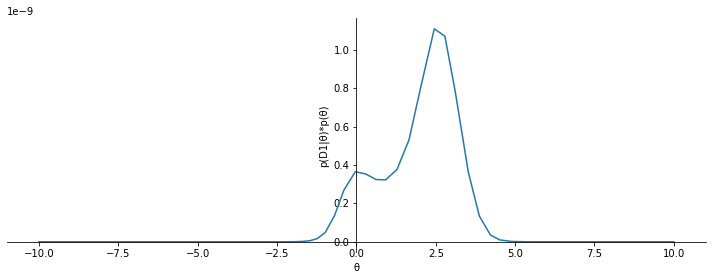

In [12]:
pTheta = 1/(10*math.pi) * 1/(1+(theta/10)**2)

pD1thetaTimespTheta = pD1theta*pTheta
sym.plot(pD1thetaTimespTheta, xlabel = 'θ', ylabel = 'p(D1|θ)*p(θ)', size = (10,4))

Υπολογίζουμε το ολοκλήρωμα της p(D1|θ) * p(θ) από τον κανόνα του τραπεζίου με βήμα 0.05 στο διάστημα (-10,10) δηλαδή αθροίζουμε το εμβαδόν των 401 επιμέρους τετραγώνων και το αθροίζουμε, αποθηκευοντάς το στο integral1


In [13]:
integral1 = 0
for i in np.linspace(-10,10,401):
    yleft = pD1thetaTimespTheta.subs({theta:i - 0.05})
    yright = pD1thetaTimespTheta.subs({theta:i})
    integral1 += ((yleft + yright)*0.05)/2
print(integral1)

2.52267930818428e-9


Ο τύπος για τον υπολογισμό του P(θ|D1) = p(D1|θ) * p(θ)/(∫p(D1|θ) * p(θ)dθ)

Οπότε προκύπτει η παρακάτω συνάρτηση

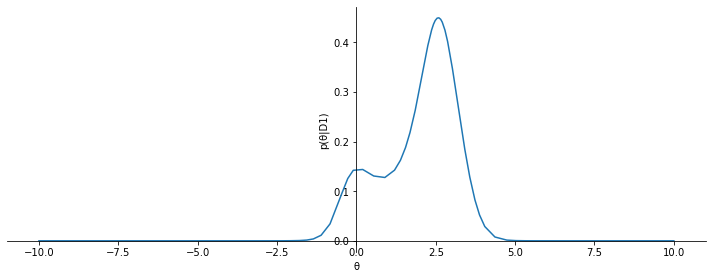

In [14]:
pthetaD1 = pD1thetaTimespTheta/integral1

sym.plot(pthetaD1, xlabel = 'θ', ylabel = 'p(θ|D1)', size = (10,4))

Ορίζουμε τον πολλαπλασιασμό p(D2|θ) * p(θ) αφού χρειάζεται για να εφαρμόσουμε την φόρμουλα bayes

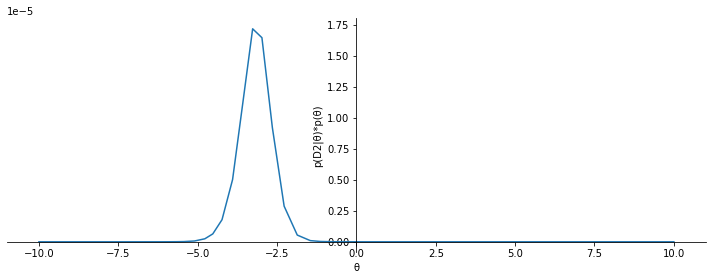

In [15]:
pD2thetaTimespTheta = pD2theta*pTheta
sym.plot(pD2thetaTimespTheta, xlabel = 'θ', ylabel = 'p(D2|θ)*p(θ)', size = (10,4))

Υπολογίζουμε το ολοκλήρωμα της p(D2|θ) * p(θ) από τον κανόνα του τραπεζίου με βήμα 0.01 στο διάστημα (-10,10) δηλαδή αθροίζουμε το εμβαδόν των 2001 επιμέρους τετραγώνων και το αθροίζουμε, αποθηκευοντάς το στο integral2. (*Έχουμε πάρει μικρότερο διάστημα από το προηγούμενο ολοκλήρωμα διότι εδώ η τιμή του ολοκληρώματος είναι *10^4 πιο μεγάλη, οπότε το σφάλμα θα ήταν μεγαλύτερο 


In [16]:
integral2 = 0
for i in np.linspace(-10, 10, 2001):
    yleft = pD2thetaTimespTheta.subs({theta:i - 0.01})
    yright = pD2thetaTimespTheta.subs({theta:i})
    integral2 += ((yleft + yright)*0.01)/2
print(integral2)

2.07823140495282e-5


Ο τύπος για τον υπολογισμό του P(θ|D1) = p(D1|θ) * p(θ)/(∫p(D1|θ) * p(θ)dθ)

Οπότε προκύπτει η παρακάτω συνάρτηση

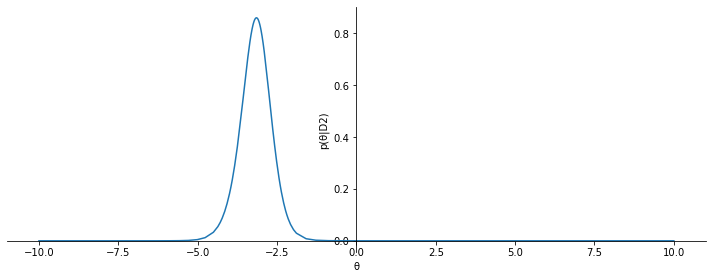

In [17]:
pthetaD2 = pD2thetaTimespTheta/integral2

sym.plot(pthetaD2, xlabel = 'θ', ylabel = 'p(θ|D2)', size = (10,4))

Απεικονίζουμε την P(θ|D1), την P(θ|D2) και την P(θ) στο ίδιο γράφημα

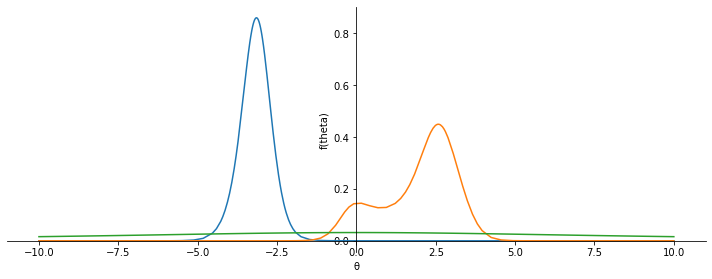

In [18]:
sym.plot(pthetaD2, pthetaD1, pTheta, xlabel = 'θ', size = (10,4))

Παρατηρούμε ότι οι τιμές τις p(θ) είναι πολύ μικρότερες σε σύγκριση με τις τιμές που προκύπτουν δεδομένου D. Αυτό είναι λογικό, καθώς η P(θ) φαίνεται να εκτείνεται από το -άπειρο εώς το +άπειρο έστω και με πολύ μικρές τιμές οπότε η πιθανότητα για μεμονωμένες περιπτώσεις γίνεται μικρότερη. 

## Ερώτημα 2

Ορίζουμε την συνάρτηση p(x|θ), καθώς και τον πολλαπλασιαμό P(x|θ) * P(θ|D1)  

In [19]:
x = sym.Symbol('x', real=True)
pxtheta = 1/(math.pi *(1+(x-theta)**2))

pxthetaTimespthetaD1 = pxtheta * pthetaD1

p(x|D1) = ∫(p(x|θ) * p(θ|D1)dθ)

Υπολογίζουμε το ολοκλήρωμα της p(x|θ) * p(θ|D1) από τον κανόνα του τραπεζίου με βήμα 0.05 στο διάστημα (-6, 6) δηλαδή αθροίζουμε το εμβαδόν των 241 επιμέρους τετραγώνων και το αθροίζουμε, αποθηκευοντάς το στο pxD1.

In [20]:
pxD1 = 0
for i in np.linspace(-6, 6, 241):
    yleft = pxthetaTimespthetaD1.subs({theta:i - 0.05})
    yright = pxthetaTimespthetaD1.subs({theta:i})
    pxD1 += ((yleft + yright)*0.05)/2

p(x|D2) = ∫(p(x|θ) * p(θ|D2)dθ)

Υπολογίζουμε το ολοκλήρωμα της p(x|θ) * p(θ|D2) από τον κανόνα του τραπεζίου με βήμα 0.05 στο διάστημα (-6,6) δηλαδή αθροίζουμε το εμβαδόν των 241 επιμέρους τετραγώνων και το αθροίζουμε, αποθηκευοντάς το στο pxD2.

Έπειτα πλοτάρουμε τα p(x|D1) και p(x|D2)

In [21]:
pxthetaTimespthetaD2 = pxtheta * pthetaD2
pxD2 = 0
for i in np.linspace(-6, 6, 241):
    yleft = pxthetaTimespthetaD2.subs({theta:i - 0.05})
    yright = pxthetaTimespthetaD2.subs({theta:i})
    pxD2 += ((yleft + yright)*0.05)/2

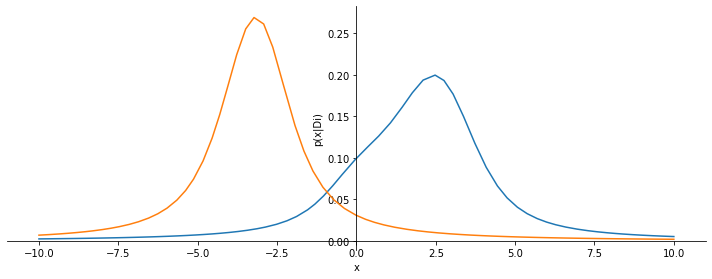

In [22]:
sym.plot(pxD1, pxD2, xlabel = 'x', ylabel = 'p(x|Di)', size = (10,4))

Ορίζουμε την συνάρτηση διάκρισης h(x) και την πλοτάρουμε για κάθε x

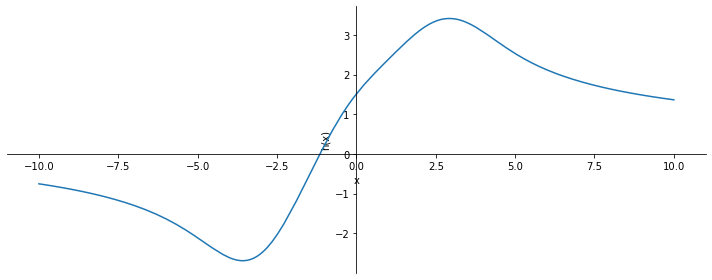

In [23]:
h = sym.log(pxD1) - sym.log(pxD2) + sym.log(7/12) - sym.log(5/12)

sym.plot(h, xlabel = 'x', ylabel = 'h(x)', size = (10,4))

Δημιουργούμε την hx function για να παίρνουμε πιο εύκολα τιμές της h(x)

In [24]:
def hx(x0):
    h0 = h.subs({x:x0})
    return h0


Αρχικοποιούμε έναν πίνακα με μηδενικά bayes_of_D1, στον οποίο θα αποθηκεύσουμε τις τιμές, που παίρνει η h(x) για τις μετρήσεις που είχαμε στο D1

In [25]:
bayes_of_D1 = np.zeros(7)

for i in range(7):
    bayes_of_D1[i] = hx(D1[i])
    

Αρχικοποιούμε έναν πίνακα με μηδενικά bayes_of_D2, στον οποίο θα αποθηκεύσουμε τις τιμές, που παίρνει η h(x) για τις μετρήσεις που είχαμε στο D2

In [26]:
bayes_of_D2 = np.zeros(5)

for i in range(5):
    bayes_of_D2[i] = hx(D2[i])
    

Πλοτάρουμε τις τιμές του που πήραμε για D1 και D2

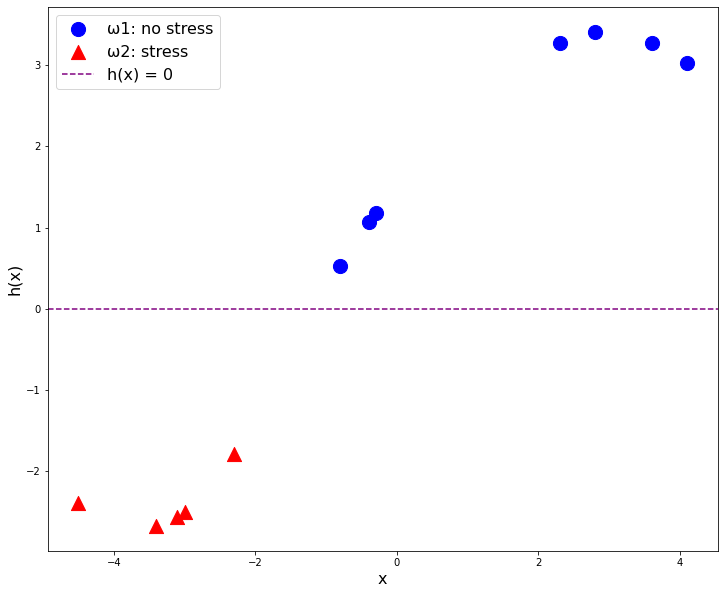

In [27]:
fig = plt.figure(figsize=(12,10))

plt.scatter(D1, bayes_of_D1, marker = 'o', s = 200, c = 'blue', label = 'ω1: no stress')
plt.scatter(D2, bayes_of_D2, marker='^', s = 200, c = 'red', label = 'ω2: stress')
plt.axhline(y = 0, color = 'purple', linestyle = '--', label = 'h(x) = 0')

plt.xlabel("x", fontsize =16)
plt.ylabel("h(x)", fontsize =16)

plt.legend(loc='upper left', fontsize =16)
plt.show()

Όπως βλέπουμε στο παραπάνω γράφημα η ταξινόμηση γίνεται σωστά. Άρα έχουμε καλύτερη απόδοση σε σχέση με την μέθοδο μέγιστης πιθανοφάνειας για το συγκεκριμένο παράδειγμα. Η διαφορά των δυό μεθόδων οφείλεται στο τρόπο εκτίμησης του θ. Η μέθοδος μέγιστης πιθανοφάνειας γενικά δεν είναι αξιόπιστη όταν τα δείγματα που έχουμε είναι μεροληπτικά ή πολύ λίγα σε πλήθος. Αυτό συμβαίνει επειδή η πιθανοφάνεια για το θ ανανεώνεται για κάθε τιμή του training set, και έχοντας μόνο 12, είναι λογικό να μην είναι ιδανική. Αντίθετα στην μέθοδο bayes, θεωρούμε ότι γνωρίζουμε με πολύ καλή προσέγγιση την κατανομή του θ και μπορούμε να πάρουμε καλύτερα αποτελέσματα. Συμπερασματικά, θα χρησιμοποιούσαμε MLE όταν το πλήθος τον δειγμάτων είναι αρκετά μεγάλο και ίσως δεν έχουμε τόση υπολογιστική ισχύ, ενώ θα προτιμούσαμε bayes αν είχαμε καλή γνώση για κάποια παράμετρο εκ των προτέρων.